In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


import matplotlib
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LinearRegression



%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


/Users/deepak/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
features=pd.read_csv('/Users/deepak/Downloads/indeed_data_science_exercise 2/train_features_2013-03-07.csv')
salaries=pd.read_csv('/Users/deepak/Downloads/indeed_data_science_exercise 2/train_salaries_2013-03-07.csv')

## EDA and Initial Exploration

In [3]:
print("SHAPE: ",features.shape)
print("SIZE:",features.size)

SHAPE:  (1000000, 8)
SIZE: 8000000


In [4]:
(features.head())

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
features.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [6]:
print(features.describe())

       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


## Is there Skew in the  Continuous Parameters?

In [7]:
print(salaries["salary"].skew())


0.346415074651


In [8]:
print(features.skew())

# Values close to 0 show less skew

yearsExperience        0.001674
milesFromMetropolis   -0.001139
dtype: float64


In [9]:
contFeatureslist = []
for colName,x in features.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)
print("",contFeatureslist)

 ['jobId', 'companyId', 'degree', 'yearsExperience', 'milesFromMetropolis']


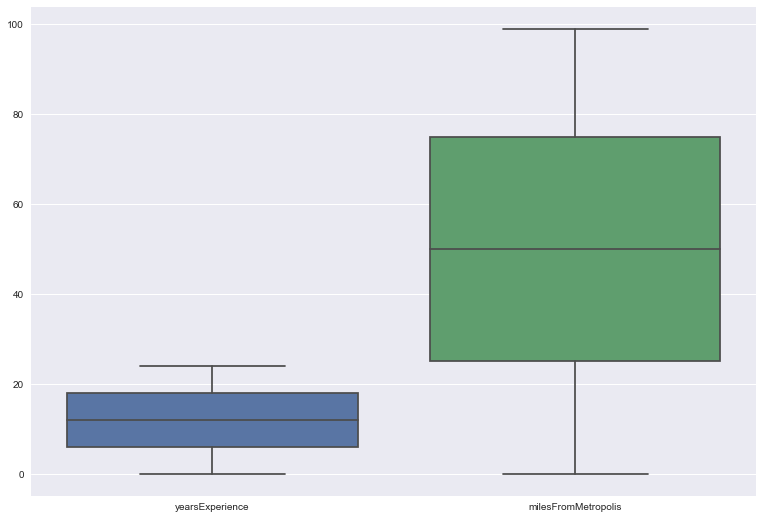

In [10]:
catFeatureslist = []
for colName,x in features.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)
plt.figure(figsize=(13,9))
sns.boxplot(features[contFeatureslist])

Skew is really small can be Ignored

In [11]:
all_data=features.join(salaries,lsuffix='_')

In [12]:
## Empty Values
all_data.isnull().sum()

jobId_                 0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
jobId                  0
salary                 0
dtype: int64

## GROUP SALARY BY DEGREE

In [13]:
salary_by_degree=all_data.groupby("degree").salary.agg(['count', 'mean', 'min', 'max'])
salary_by_degree

,count,mean,min,max
degree,,,,
BACHELORS,175495,125.454663,35,294
DOCTORAL,175364,135.489433,0,301
HIGH_SCHOOL,236976,101.920654,0,260
MASTERS,175311,130.504903,0,301
NONE,236854,98.176467,0,254


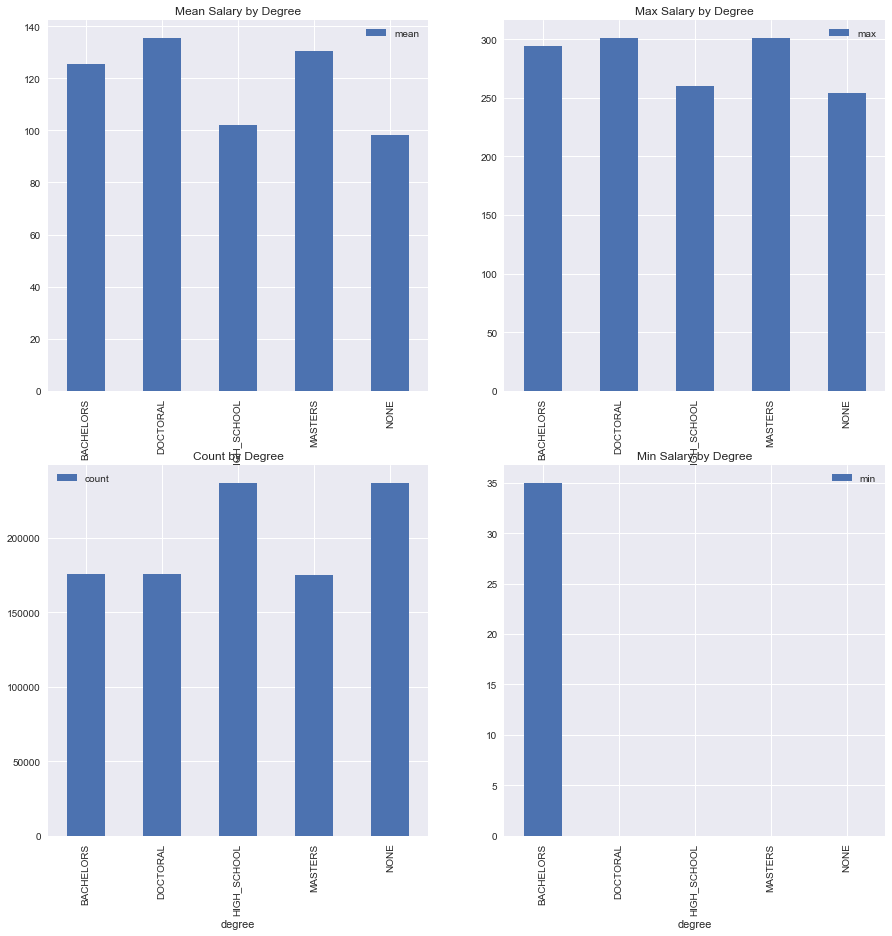

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
salary_by_degree.plot(y='mean',kind="bar",title="Mean Salary by Degree",ax=axes[0,0],figsize=(15,15))
salary_by_degree.plot(y='max',kind="bar",title="Max Salary by Degree",ax=axes[0,1])
salary_by_degree.plot(y='count',kind="bar",title="Count by Degree",ax=axes[1,0])
salary_by_degree.plot(y='min',kind="bar",title="Min Salary by Degree",ax=axes[1,1])

plt.show()

## Observations:

* As Expected mean Salary has the following order- 
Doctoral > Masters > Bachelors > None


* Minimum Salary doesnt make sense bacaause of '0' Salary in some cases

## GROUP SALARY BY INDUSTRY

In [15]:
salary_by_industry=all_data.groupby("industry").salary.agg(['count', 'mean', 'min', 'max'])
salary_by_industry

,count,mean,min,max
industry,,,,
AUTO,142943,109.433690,0,264
EDUCATION,142819,99.448386,17,253
FINANCE,142867,130.746743,0,294
HEALTH,142755,115.735540,28,275
OIL,142771,130.952946,0,301
SERVICE,142639,104.446820,22,256
WEB,143206,121.644512,0,290


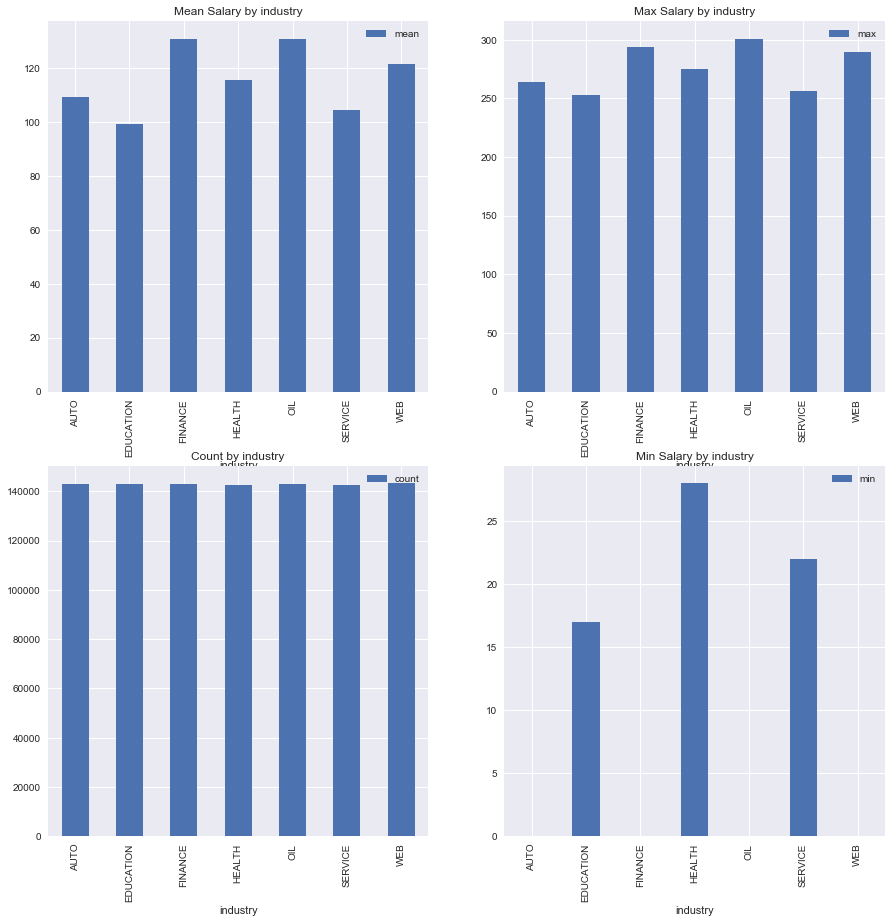

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
salary_by_industry.plot(y='mean',kind="bar",title="Mean Salary by industry",ax=axes[0,0],figsize=(15,15))
salary_by_industry.plot(y='max',kind="bar",title="Max Salary by industry",ax=axes[0,1])
salary_by_industry.plot(y='count',kind="bar",title="Count by industry",ax=axes[1,0])
salary_by_industry.plot(y='min',kind="bar",title="Min Salary by industry",ax=axes[1,1])

plt.show()

## GROUP SALARY BY JOBTYPE

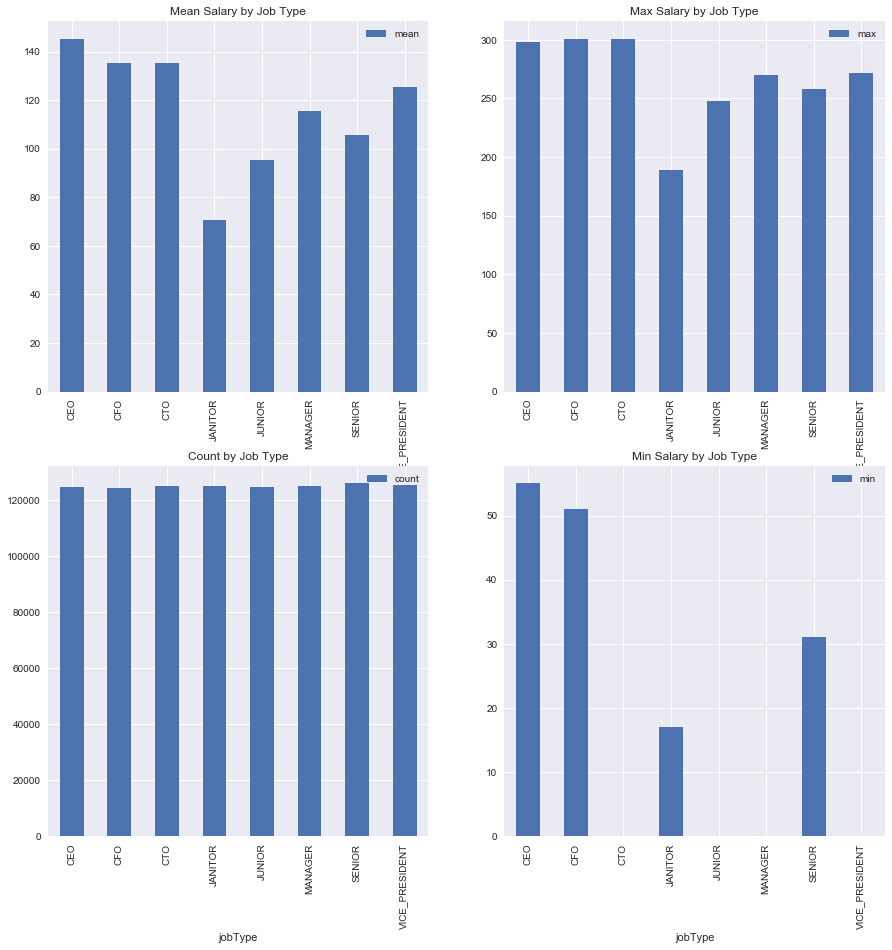

In [17]:
salary_by_jobType=all_data.groupby("jobType").salary.agg(['count', 'mean', 'min', 'max'])
salary_by_jobType
fig, axes = plt.subplots(nrows=2, ncols=2)
salary_by_jobType.plot(y='mean',kind="bar",title="Mean Salary by Job Type",ax=axes[0,0],figsize=(15,15))
salary_by_jobType.plot(y='max',kind="bar",title="Max Salary by Job Type",ax=axes[0,1])
salary_by_jobType.plot(y='count',kind="bar",title="Count by Job Type",ax=axes[1,0])
salary_by_jobType.plot(y='min',kind="bar",title="Min Salary by Job Type",ax=axes[1,1])

plt.show()

In [18]:
salary_by_jobType

,count,mean,min,max
jobType,,,,
CEO,124778,145.311425,55,298
CFO,124369,135.458547,51,301
CTO,125046,135.479983,0,301
JANITOR,124971,70.813045,17,189
JUNIOR,124594,95.331557,0,248
MANAGER,125121,115.367596,0,270
SENIOR,125886,105.487775,31,258
VICE_PRESIDENT,125235,125.367629,0,272


## OBSERVATIONS
* Average SALARY is maximum for CEO and minimum for Janitor(almost half of CEO )
* Almost Equal number of Observations for each Job type

## GROUP SALARY BY YEARS OF EXPERIENCE

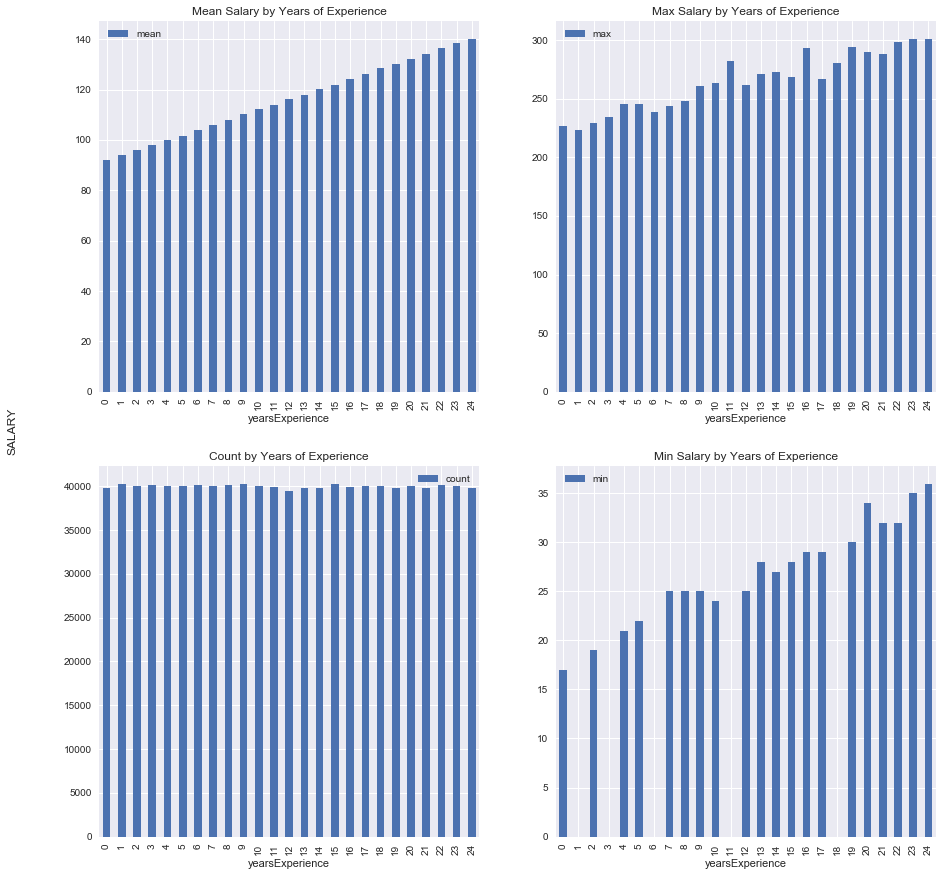

In [19]:
value=all_data.groupby("yearsExperience").salary.agg(['count', 'mean', 'min', 'max'])
value
fig, axes = plt.subplots(nrows=2, ncols=2)
value.plot(y='mean',kind="bar",title="Mean Salary by Years of Experience",ax=axes[0,0],figsize=(15,15))
value.plot(y='max',kind="bar",title="Max Salary by Years of Experience",ax=axes[0,1])
value.plot(y='count',kind="bar",title="Count by Years of Experience",ax=axes[1,0])
value.plot(y='min',kind="bar",title="Min Salary by Years of Experience",ax=axes[1,1])
fig.text(0.04,0.5, 'SALARY', va='center', rotation='vertical')

plt.show()

In [20]:
value[0:5]

,count,mean,min,max
yearsExperience,,,,
0,39839,91.873541,17,227
1,40265,93.960040,0,223
2,40045,96.125184,19,229
3,40191,98.090368,0,234
4,40036,100.014112,21,245


## OBSERVATIONS

* We see a clear linear trend in increase of mean salary with years of expereince

## GROUP SALARY BY YEARS OF miles from Metroplois

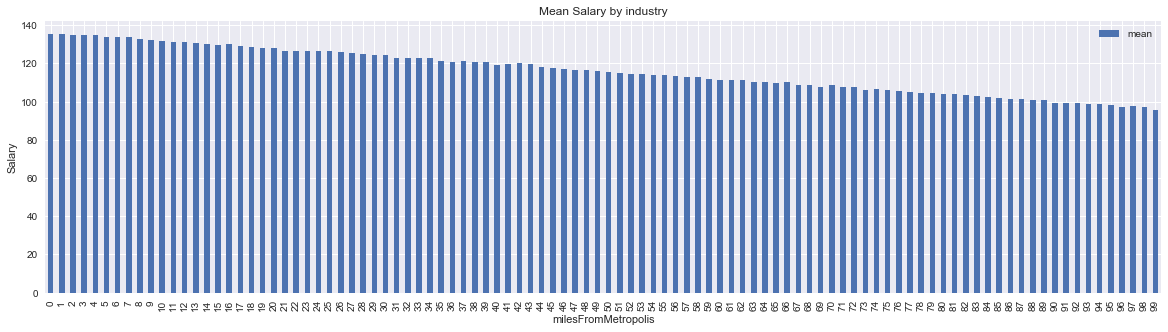

In [21]:
value=all_data.groupby("milesFromMetropolis").salary.agg(['count', 'mean', 'min', 'max'])
value
value.plot(y='mean',kind="bar",title="Mean Salary by industry",figsize=(20,5))
plt.ylabel('Salary')
# value.plot(y='max',kind="bar",title="Max Salary by industry",ax=axes[0,1])
# value.plot(y='count',kind="bar",title="Count by industry",ax=axes[1,0])
# value.plot(y='min',kind="bar",title="Min Salary by industry",ax=axes[1,1])

# plt.show()

## OBSERVATION

* There is a clear trend that as distance from metropolis increases salary decreases

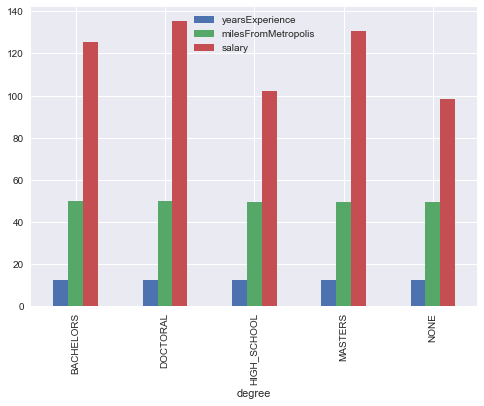

In [22]:
#x=all_data.drop(["yearsExperience"],axis=1)
all_data.groupby("degree").mean().plot(kind="bar")

In [23]:
all_data.head()

,jobId_,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobId,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,JOB1362684407687,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,JOB1362684407688,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,JOB1362684407689,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,JOB1362684407690,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,JOB1362684407691,163


## Normalized count by Categorical Variables

In [24]:
print("degree-Normalized Count: \n",all_data.degree.value_counts(normalize=True),"\n")
print("industry-Normalized Count: \n",all_data.industry.value_counts(normalize=True),"\n")
print("jobType-Normalized Count: \n",all_data.jobType.value_counts(normalize=True),"\n")

degree-Normalized Count: 
 HIGH_SCHOOL    0.236976
NONE           0.236854
BACHELORS      0.175495
DOCTORAL       0.175364
MASTERS        0.175311
Name: degree, dtype: float64 

industry-Normalized Count: 
 WEB          0.143206
AUTO         0.142943
FINANCE      0.142867
EDUCATION    0.142819
OIL          0.142771
HEALTH       0.142755
SERVICE      0.142639
Name: industry, dtype: float64 

jobType-Normalized Count: 
 SENIOR            0.125886
VICE_PRESIDENT    0.125235
MANAGER           0.125121
CTO               0.125046
JANITOR           0.124971
CEO               0.124778
JUNIOR            0.124594
CFO               0.124369
Name: jobType, dtype: float64 



There seems to be a uniform distrbution of examples between different categorical values

## What Industry are most educated and least educated people working in?

industry         AUTO  EDUCATION   FINANCE    HEALTH       OIL   SERVICE  \
degree                                                                     
BACHELORS    0.025212   0.025143  0.025065  0.025002  0.024922  0.025064   
DOCTORAL     0.025231   0.025060  0.025085  0.025105  0.025187  0.024699   
HIGH_SCHOOL  0.033581   0.034058  0.033769  0.033867  0.033959  0.033634   
MASTERS      0.025006   0.024814  0.025088  0.025123  0.024975  0.025080   
NONE         0.033913   0.033744  0.033860  0.033658  0.033728  0.034162   

industry          WEB  
degree                 
BACHELORS    0.025087  
DOCTORAL     0.024997  
HIGH_SCHOOL  0.034108  
MASTERS      0.025225  
NONE         0.033789  


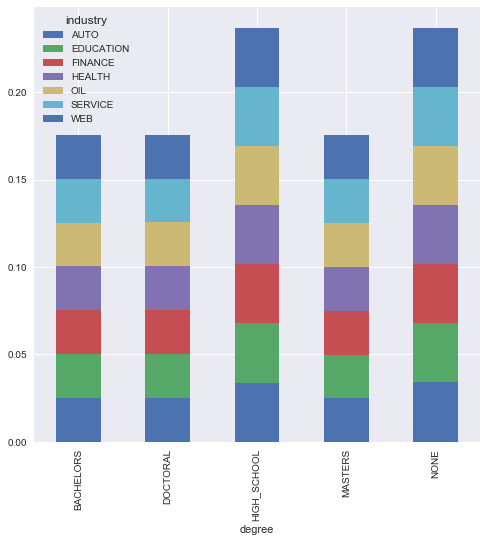

In [25]:
table=pd.crosstab(all_data.degree, all_data.industry, normalize=True)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Most educated and least educated people are uniformly spread across all industries

In [26]:
table

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
degree,,,,,,,
BACHELORS,0.025212,0.025143,0.025065,0.025002,0.024922,0.025064,0.025087
DOCTORAL,0.025231,0.025060,0.025085,0.025105,0.025187,0.024699,0.024997
HIGH_SCHOOL,0.033581,0.034058,0.033769,0.033867,0.033959,0.033634,0.034108
MASTERS,0.025006,0.024814,0.025088,0.025123,0.024975,0.025080,0.025225
NONE,0.033913,0.033744,0.033860,0.033658,0.033728,0.034162,0.033789


jobType           CEO       CFO       CTO   JANITOR    JUNIOR   MANAGER  \
degree                                                                    
BACHELORS    0.025123  0.024983  0.025057  0.000000  0.024872  0.025018   
DOCTORAL     0.025145  0.024697  0.024920  0.000000  0.025021  0.024968   
HIGH_SCHOOL  0.024721  0.024912  0.024894  0.062427  0.025080  0.024895   
MASTERS      0.024891  0.025063  0.025293  0.000000  0.024839  0.025148   
NONE         0.024898  0.024714  0.024882  0.062544  0.024782  0.025092   

jobType        SENIOR  VICE_PRESIDENT  
degree                                 
BACHELORS    0.025318        0.025124  
DOCTORAL     0.025379        0.025234  
HIGH_SCHOOL  0.024846        0.025201  
MASTERS      0.025226        0.024851  
NONE         0.025117        0.024825  


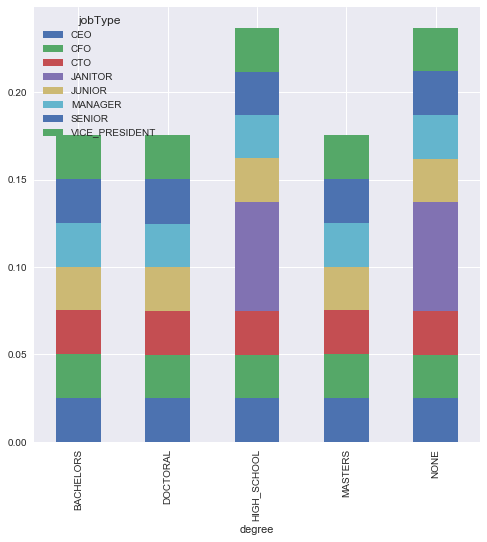

In [27]:
table=pd.crosstab(all_data.degree, all_data.jobType, normalize=True)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

* High school degree holders as likely to become CEO's  as PhD holders
* All Janitors have high school or 'NONE' degree

In [28]:
## SALARY by confidence Intervals

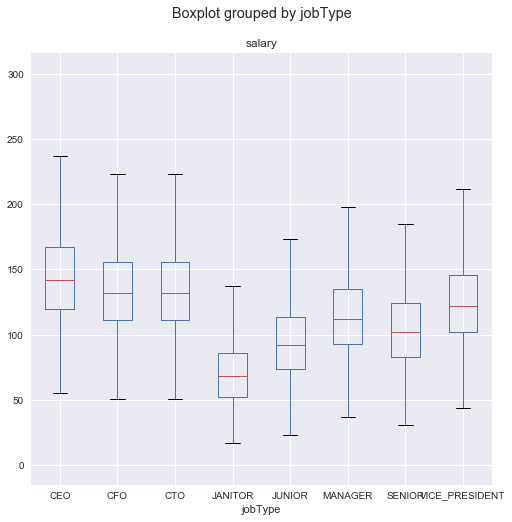

In [29]:
all_data.boxplot(column="salary",        # Column to plot
                 by= "jobType",         # Column to split upon
                 figsize= (8,8))        # Figure size

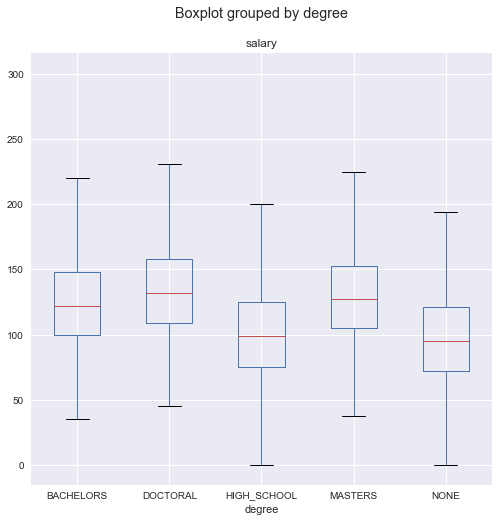

In [30]:
all_data.boxplot(column="salary",        # Column to plot
                 by= "degree",         # Column to split upon
                 figsize= (8,8))        # Figure size

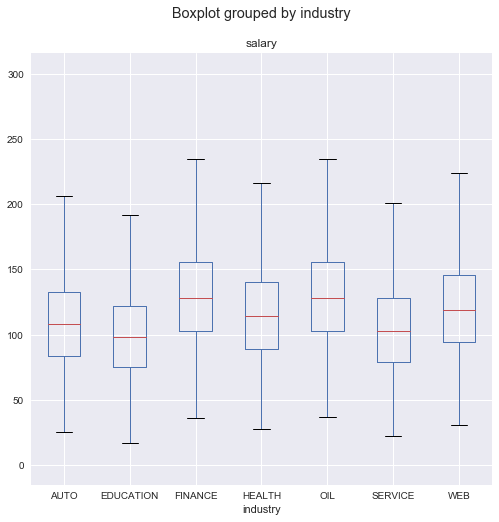

In [31]:
all_data.boxplot(column="salary",        # Column to plot
                 by= "industry",         # Column to split upon
                 figsize= (8,8))        # Figure size

## Salary Distribution

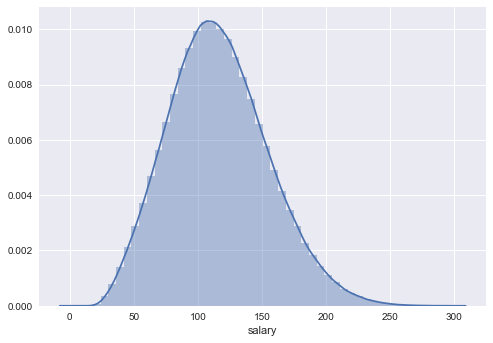

In [32]:
sns.distplot((salaries["salary"]))

* Salary is normally distributed no need for transformations.

In [33]:
all_data.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

* Salary is normally distribued with a mean of 116K

In [34]:
###recode degree as ordinal and JobType may have to be done
##maycome back and recode to dummy variables
all_data['degree'] = all_data['degree'].astype('category')
all_data['degree'] = all_data['degree'].cat.reorder_categories(['NONE','HIGH_SCHOOL','BACHELORS','MASTERS', 'DOCTORAL'], ordered=True)
all_data['degree1'] = all_data['degree'].cat.codes

In [35]:
###transform other variables into dummies
for t in ['jobType','major','industry']:
    new=pd.get_dummies(features[t],prefix=t)
    all_data=pd.concat([features, new], axis=1)

In [36]:
all_data.describe()

,yearsExperience,milesFromMetropolis,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,0.142943,0.142819,0.142867,0.142755,0.142771,0.142639,0.143206
std,7.212391,28.877733,0.350015,0.349888,0.349937,0.349823,0.349839,0.349705,0.350283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
###run correlation matrix
corr=all_data.corr()
corr

,yearsExperience,milesFromMetropolis,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
yearsExperience,1.000000,0.000673,-0.001003,0.000437,0.000981,-0.001105,0.000798,0.000129,-0.000236
milesFromMetropolis,0.000673,1.000000,0.000343,0.000808,0.000048,-0.000398,-0.000551,0.000687,-0.000936
industry_AUTO,-0.001003,0.000343,1.000000,-0.166699,-0.166732,-0.166656,-0.166666,-0.166577,-0.166963
industry_EDUCATION,0.000437,0.000808,-0.166699,1.000000,-0.166647,-0.166571,-0.166582,-0.166492,-0.166878
industry_FINANCE,0.000981,0.000048,-0.166732,-0.166647,1.000000,-0.166604,-0.166615,-0.166525,-0.166911
industry_HEALTH,-0.001105,-0.000398,-0.166656,-0.166571,-0.166604,1.000000,-0.166539,-0.166449,-0.166834
industry_OIL,0.000798,-0.000551,-0.166666,-0.166582,-0.166615,-0.166539,1.000000,-0.166460,-0.166845
industry_SERVICE,0.000129,0.000687,-0.166577,-0.166492,-0.166525,-0.166449,-0.166460,1.000000,-0.166755
industry_WEB,-0.000236,-0.000936,-0.166963,-0.166878,-0.166911,-0.166834,-0.166845,-0.166755,1.000000


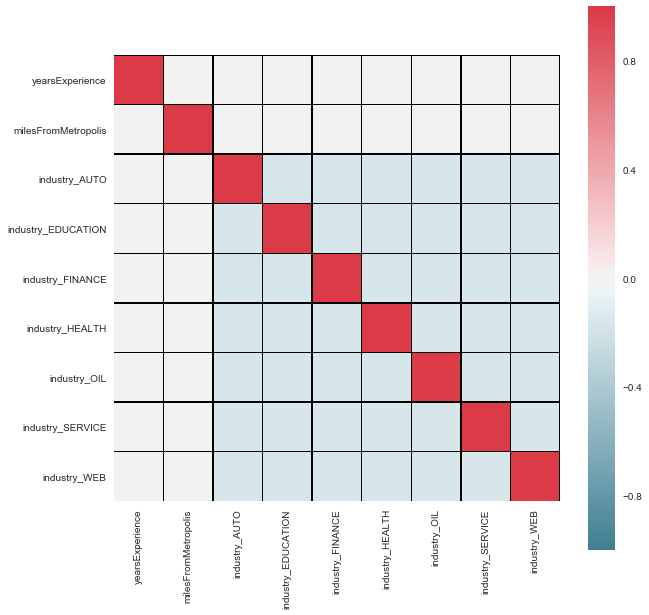

In [38]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(all_data.corr(),linewidths=0.25,vmax=1.0,cmap=cmap,square=True, linecolor='black')
sns.plt.show()


In [57]:
features.companyId.unique()


array(['COMP37', 'COMP19', 'COMP52', 'COMP38', 'COMP7', 'COMP15', 'COMP24',
       'COMP20', 'COMP41', 'COMP56', 'COMP4', 'COMP54', 'COMP57', 'COMP14',
       'COMP61', 'COMP58', 'COMP3', 'COMP44', 'COMP30', 'COMP27', 'COMP34',
       'COMP11', 'COMP31', 'COMP49', 'COMP0', 'COMP1', 'COMP36', 'COMP47',
       'COMP8', 'COMP42', 'COMP50', 'COMP53', 'COMP48', 'COMP45', 'COMP46',
       'COMP2', 'COMP5', 'COMP55', 'COMP29', 'COMP40', 'COMP33', 'COMP22',
       'COMP12', 'COMP25', 'COMP6', 'COMP23', 'COMP17', 'COMP28', 'COMP21',
       'COMP26', 'COMP43', 'COMP51', 'COMP10', 'COMP59', 'COMP13',
       'COMP39', 'COMP16', 'COMP9', 'COMP32', 'COMP62', 'COMP35', 'COMP18',
       'COMP60'], dtype=object)

In [62]:
train_data=features.drop(["jobId","companyId"],axis=1)
objects = list(train_data.select_dtypes(include=['object']).columns)
objects

['jobType', 'degree', 'major', 'industry']

In [63]:
from sklearn.feature_extraction import DictVectorizer

def one_hot_dataframe(data, cols, replace=False):
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)


In [66]:
train_data.head()

,yearsExperience,milesFromMetropolis,degree=BACHELORS,degree=DOCTORAL,degree=HIGH_SCHOOL,degree=MASTERS,degree=NONE,industry=AUTO,industry=EDUCATION,industry=FINANCE,...,jobType=VICE_PRESIDENT,major=BIOLOGY,major=BUSINESS,major=CHEMISTRY,major=COMPSCI,major=ENGINEERING,major=LITERATURE,major=MATH,major=NONE,major=PHYSICS
0,10,83,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,17,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
train_data, _, _ = one_hot_dataframe(train_data,objects, replace=True)
print (train_data.head(2))

   yearsExperience  milesFromMetropolis  degree=BACHELORS  degree=DOCTORAL  \
0               10                   83               0.0              0.0   
1                3                   73               0.0              0.0   

   degree=HIGH_SCHOOL  degree=MASTERS  degree=NONE  industry=AUTO  \
0                 0.0             1.0          0.0            0.0   
1                 1.0             0.0          0.0            0.0   

   industry=EDUCATION  industry=FINANCE      ...        \
0                 0.0               0.0      ...         
1                 0.0               0.0      ...         

   jobType=VICE_PRESIDENT  major=BIOLOGY  major=BUSINESS  major=CHEMISTRY  \
0                     0.0            0.0             0.0              0.0   
1                     0.0            0.0             0.0              0.0   

   major=COMPSCI  major=ENGINEERING  major=LITERATURE  major=MATH  major=NONE  \
0            0.0                0.0               0.0         1.0    

## SPLIT DATA FOR CROSS-VALIDATION

In [67]:
from sklearn.cross_validation import train_test_split
#all_data=all_data.drop(["salary"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data, salaries["salary"], random_state=1)

## Model 1 : Linear Regression

In [68]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
# print the intercept and coefficients
print("INTERCERPT",linreg.intercept_)
print("COEFFICENTS",linreg.coef_[0:5])

INTERCERPT -807604955367.0
COEFFICENTS [  2.00923570e+00  -4.00000917e-01  -1.30901008e+11  -1.30901008e+11
  -1.30901008e+11]


INTERCEPT  is equal to the mean Salary.

### pair the feature names with the coefficients

In [70]:
list(zip(train_data.columns, linreg.coef_))[0:5]

[('yearsExperience', 2.0092356977155705),
 ('milesFromMetropolis', -0.40000091746839483),
 ('degree=BACHELORS', -130901008463.24237),
 ('degree=DOCTORAL', -130901008453.23749),
 ('degree=HIGH_SCHOOL', -130901008468.99805)]

### Model Performance

In [71]:
y_pred = linreg.predict(X_test)
r2_score(y_pred,y_test, multioutput='variance_weighted')

0.65623713746613599

In [96]:
y_2=clf.predict(X_test)
r2_score(y_2,y_test, multioutput='variance_weighted')

0.61449059335493517

#### R-Squared=0.6563996859990997

In [79]:
for name,i_cols_list in X_all:
    print(name,i_cols_list)

All [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


## Ridge

In [97]:
clf = Ridge(alpha=10000)
clf.fit(X_train,y_train) 
#result = mean_absolute_error(y_test,model.predict(X_test))
y_2=clf.predict(X_test)
r2_score(y_2,y_test, multioutput='variance_weighted')

0.61449059335493517

## LAsso

In [102]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
clf = Lasso(alpha=.001,random_state=seed)

clf.fit(X_train,y_train) 
y_2=clf.predict(X_test)
r2_score(y_2,y_test, multioutput='variance_weighted')

KeyboardInterrupt: 

In [ ]:
seed = 0
mae=[]
comb=[]
from sklearn.linear_model import ElasticNet

a_list = np.array([0.001,0.5,100])
for alpha in a_list:
    for name,i_cols_list in X_all:

        #Set the base model
        model = ElasticNet(alpha=alpha,random_state=seed)

        algo = "Ridge"

        #Accuracy of the model using all features
        model.fit(X_train,y_train)
        result = mean_absolute_error(y_test,model.predict(X_test))
        mae.append(result)
        print("name" + " %s" % result)

    comb.append(algo + " %s" % alpha )

In [ ]:
#Evaluation of various combinations of KNN

#Import the library
from sklearn.neighbors import KNeighborsRegressor

#Add the N value to the below list if you want to run the algo
n_list = np.array([2,12,14])

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
    

    algo = "Ridge"

    #Accuracy of the model using all features
    model.fit(X_train,y_train)
    result = mean_absolute_error(y_test,model.predict(X_test))
    mae.append(result)
    print("name" + " %s" % result)

    comb.append(algo + " %s" % alpha )

In [ ]:
test=pd.read_csv("/Users/deepak/Downloads/indeed_data_science_exercise/test_features_2013-03-07.csv")

In [ ]:
test.head()

In [ ]:
test, _, _ = one_hot_dataframe(test, ['degree',"major","industry","companyId","jobType"], replace=True)


In [ ]:
test=test.drop(["jobId"],axis=1)

In [ ]:
sal=linreg.predict(test)

In [ ]:
sal

In [ ]:
X_test.head()

In [ ]:
set(X_test.columns)-set(test.columns)